# Sprint 4

# ライブラリの読み込み

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
%matplotlib inline

# スクラッチ実装

In [26]:
class ScratchLogisticRegression():
    
    def __init__(self, iter_num, lr,lam):
        """各種変数初期化＆定義
        Parameters
        ----------
        iter:学習回数
        lr:学習率
        theta:重み
        lam:正則化パラメータ
        train_loss:訓練データの損失
        val_loss:評価データの損失
        """
        self.iter_num = iter_num
        self.lr = lr
        self.theta = np.random.rand(X.shape[1]+1)
        self.lam = lam
        self.train_loss = np.zeros(self.iter_num+1)
        self.val_loss = np.zeros(self.iter_num+1)

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        """訓練
        Parameters
        ----------
        X_train:訓練データ（説明変数）
        y_train:訓練データ（目的変数）
        X_val:評価データ（説明変数）
        y_val:評価データ（目的変数）
        """
        # 損失の初期値保存
        self.train_loss[0] = self.mean_crossentropy_error(X_train,y_train)
        if X_val is not None:
            self.val_loss[0] = self.mean_crossentropy_error(X_val,y_val)

        # 学習回数分ループ
        for n in range(self.iter_num):
            # Θを更新
            self.gradient_descent(X_train,y_train)
            # 損失計算と保存
            self.train_loss[n+1] = self.mean_crossentropy_error(X_train,y_train)
            if X_val is not None:
                self.val_loss[n+1] = self.mean_crossentropy_error(X_val,y_val)
                
        # 最終結果格納
        self.prediction = self.predict_proba(X)
        self.prediction_class = np.where(self.prediction >= 0.5,1,0)

    def gradient_descent(self,X_train,y_train):
        """Θ更新（最急降下法）
        Parameters
        ----------
        X_train:訓練データ（説明変数）
        y_train:訓練データ（目的変数）
        X_val:評価データ（説明変数）
        y_val:評価データ（目的変数）
        """
        # 誤差
        error = (self.predict_proba(X_train) - y_train.flatten())
        # 勾配
        grad= np.dot(X_train.T,error)/X_train.shape[0]
        # 定数項の勾配
        bias_grad = np.sum(error)/X_train.shape[0]
        # l2正則化項
        l2 = self.lam * self.theta[:-1] / X_train.shape[0]
        # 学習率を考慮して更新
        self.theta[:-1] = self.theta[:-1] - self.lr * (grad + l2)
        self.theta[-1] = self.theta[-1] - self.lr * bias_grad
        

    def predict(self, X):
        """予測
        Parameters
        ----------
        X:説明変数
        """
        return  np.where(self.predict_proba(X) >= 0.5,1,0)

    def predict_proba(self, X):
        """確率予測
        Parameters
        ----------
        X:説明変数
        """
        # xとΘの積（定数項は別で扱う）
        _y = np.dot(self.theta[:-1],X.T) + self.theta[-1]
        # sigmoid関数を適用
        y = self.sigmoid(_y)
        return y
    
    def sigmoid(self,y):
        """sigmoid関数
        Parameters
        ----------
        y:sigmoid関数に通したい値
        """
        return 1 / (1 + np.exp(-y))
    
    def mean_crossentropy_error(self,X,y):
        """クロスエントロピー誤差関数
        Parameters
        ----------
        X:sigmoid関数に通したい値
        """
        # 予測値を計算
        prediction = self.predict_proba(X)
        # クロスエントロピー誤差
        crossentropy =  -np.sum(y *  np.log(prediction) + (1-y) * np.log(1-prediction))/X.shape[0]
        # l2正則化
        l2_decay = np.sum(self.theta[:-1]**2)*self.lam/(2 * X.shape[0])
        return crossentropy + l2_decay

# データ読み込み＆前処理

In [27]:
iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
y = np.where(y==1, 0, 1)
X = np.array(X)
y = np.array(y)
y = y.reshape([100,1])

In [28]:
iris_df = pd.DataFrame(X, columns=["sepal_length","sepal_width", "petal_length", "petal_width"])
iris_label = pd.DataFrame(y, columns=["Species"])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,7.0,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
2,6.9,3.1,4.9,1.5
3,5.5,2.3,4.0,1.3
4,6.5,2.8,4.6,1.5


In [37]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0,)

# 学習

In [45]:
slr = ScratchLogisticRegression(iter_num=10000, lr=0.0001,lam = 0.1)
slr.fit(X_train,y_train,X_test,y_test)

# 推定

In [46]:
slr.prediction

array([0.45454924, 0.52474298, 0.4722843 , 0.52929071, 0.49606373,
       0.5278913 , 0.55180808, 0.54184667, 0.4572079 , 0.59112726,
       0.51154362, 0.56116457, 0.43087328, 0.51413839, 0.55588326,
       0.47943993, 0.58027884, 0.46867072, 0.4941721 , 0.49676272,
       0.61193337, 0.50361031, 0.49327067, 0.4740078 , 0.47861851,
       0.48293736, 0.45049238, 0.5177115 , 0.54336312, 0.4823367 ,
       0.50196462, 0.48593875, 0.50748646, 0.54150935, 0.5961704 ,
       0.58389811, 0.49205948, 0.45701705, 0.55212935, 0.5386461 ,
       0.5188865 , 0.52052968, 0.50108794, 0.52901072, 0.53645653,
       0.5246688 , 0.53764708, 0.49500947, 0.55286989, 0.53466281,
       0.680887  , 0.60939873, 0.54044327, 0.55315726, 0.60746961,
       0.48762786, 0.64597989, 0.45953152, 0.49835402, 0.6253169 ,
       0.59388244, 0.55831909, 0.57144354, 0.62661256, 0.69384699,
       0.64839682, 0.54324581, 0.53300113, 0.49098592, 0.50207789,
       0.60366711, 0.64878709, 0.45075582, 0.55562553, 0.58985

In [47]:
slr.prediction_class

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# テストデータに対する評価

In [48]:
y_pred = slr.predict(X_test)
y_pred = y_pred.reshape(y_test.shape)

In [49]:
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

0.5652173913043478
0.8666666666666667
0.6842105263157895
[[ 5 10]
 [ 2 13]]


# 可視化

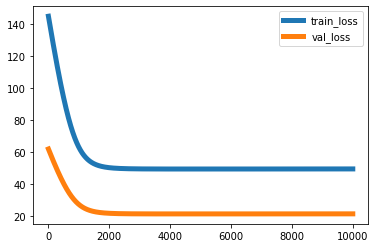

In [50]:
plt.plot(np.arange(1,len(slr.train_loss)+1),slr.train_loss,label='train_loss',linewidth=5)
plt.plot(np.arange(1,len(slr.val_loss)+1),slr.val_loss,label='val_loss',linewidth=5)
plt.legend()

In [51]:
slr.theta

array([-0.32807687,  0.18798088, -0.06798216,  0.70916574,  0.83937706])

# 決定領域

In [52]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [58]:
X = iris.data[:100,:]
y = iris.target[:100]
X = X[:,[0,2]]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.5, random_state=0,)

In [59]:
slr = ScratchLogisticRegression(iter_num=10000, lr=0.0001,lam = 0.1)
slr.fit(X_train, y_train,X_test,y_test)

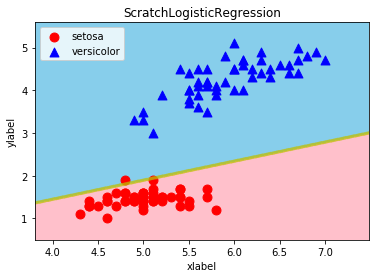

In [60]:
decision_region(X, y, slr, step=0.01, title='ScratchLogisticRegression', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor'])